## 13. 모델 합성

### 13.1. 데이터셋 준비

AMES 집값 데이터

데이터 스펙

http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

데이터 다운로드

https://www.kaggle.com/datasets/prevek18/ames-housing-dataset

In [2]:
using CSV, DataFrames
ames = CSV.read("AmesHousing_clean.csv", DataFrame);

In [3]:
using MLJ
ames = select(ames, Not([:Order, :PID]))

function set_scitypes(ames)
    coerce_ames = (
        :MSSubClass     => Multiclass,
        :MSZoning       => Multiclass,
        :LotFrontage    => Continuous,
        :LotArea        => Continuous,
        :Street         => Multiclass,
        :Alley          => Multiclass,
        :LotShape       => OrderedFactor,
        :LandContour    => Multiclass,
        :Utilities      => OrderedFactor,
        :LotConfig      => Multiclass,
        :LandSlope      => OrderedFactor,
        :Neighborhood   => Multiclass,
        :Condition1     => Multiclass,
        :Condition2     => Multiclass,
        :BldgType       => Multiclass,
        :HouseStyle     => Multiclass,
        :OverallQual    => OrderedFactor,
        :OverallCond    => OrderedFactor,
        :YearBuilt      => Count,
        :YearRemodAdd   => Count,
        :RoofStyle      => Multiclass,
        :RoofMatl       => Multiclass,
        :Exterior1st    => Multiclass,
        :Exterior2nd    => Multiclass,
        :MasVnrType     => Multiclass,
        :MasVnrArea     => Continuous,
        :ExterQual      => OrderedFactor,
        :ExterCond      => OrderedFactor,
        :Foundation     => Multiclass,
        :BsmtQual       => OrderedFactor,
        :BsmtCond       => OrderedFactor,
        :BsmtExposure   => OrderedFactor,
        :BsmtFinType1   => OrderedFactor,
        :BsmtFinSF1     => Continuous,
        :BsmtFinType2   => OrderedFactor,
        :BsmtFinSF2     => Continuous,
        :BsmtUnfSF      => Continuous,
        :TotalBsmtSF    => Continuous,
        :Heating        => Multiclass,
        :HeatingQC      => OrderedFactor,
        :CentralAir     => Multiclass,
        :Electrical     => OrderedFactor,
        :x1stFlrSF      => Continuous,
        :x2ndFlrSF      => Continuous,
        :LowQualFinSF   => Continuous,
        :GrLivArea      => Continuous,
        :BsmtFullBath   => Count,
        :BsmtHalfBath   => Count,
        :FullBath       => Count,
        :HalfBath       => Count,
        :BedroomAbvGr   => Count,
        :KitchenAbvGr   => Count,
        :KitchenQual    => OrderedFactor,
        :TotRmsAbvGrd   => Count,
        :Functional     => OrderedFactor,
        :Fireplaces     => Count,
        :FireplaceQu    => OrderedFactor,
        :GarageType     => Multiclass,
        :GarageYrBlt    => Count,
        :GarageFinish   => OrderedFactor,
        :GarageCars     => Count,
        :GarageArea     => Continuous,
        :GarageQual     => OrderedFactor,
        :GarageCond     => OrderedFactor,
        :PavedDrive     => OrderedFactor,
        :WoodDeckSF     => Continuous,
        :OpenPorchSF    => Continuous,
        :EnclosedPorch  => Continuous,
        :x3SsnPorch     => Continuous,
        :ScreenPorch    => Continuous,
        :PoolArea       => Continuous,
        :PoolQC         => OrderedFactor,
        :Fence          => OrderedFactor,
        :MiscFeature    => Multiclass,
        :MiscVal        => Continuous,
        :MoSold         => Multiclass,
        :YrSold         => Count,
        :SaleType       => Multiclass,
        :SaleCondition  => Multiclass,
        :SalePrice      => Continuous);

    ames = coerce(ames, coerce_ames...)

    levels!(ames.LotShape, reverse(["Reg", "IR1", "IR2", "IR3"]));
    levels!(ames.Utilities, reverse(["AllPub", "NoSewr", "NoSeWa", "ELO"]));
    levels!(ames.LandSlope, reverse(["Gtl", "Mod", "Sev"]));
    levels!(ames.ExterQual, ["Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.ExterCond, ["Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.HeatingQC, ["Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.KitchenQual, ["Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.BsmtQual, ["NA", "Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.BsmtCond, ["NA", "Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.BsmtExposure, ["NA", "No", "Mn", "Av", "Gd"]);
    levels!(ames.BsmtFinType1, ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);
    levels!(ames.BsmtFinType2, ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);
    levels!(ames.HeatingQC, ["NA", "Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.Electrical, ["NA", "Mix", "FuseP", "FuseF", "FuseA", "SBrkr"]);
    levels!(ames.KitchenQual, ["NA", "Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.FireplaceQu, ["NA", "Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.GarageFinish, ["NA", "Unf", "RFn", "Fin"]);
    levels!(ames.GarageQual, ["NA", "Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.GarageCond, ["NA", "Po", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.PavedDrive, ["N", "P", "Y"]);
    levels!(ames.PoolQC, ["NA", "Fa", "TA", "Gd", "Ex"]);
    levels!(ames.Fence, ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"]);
    levels!(ames.Functional, reverse(["Typ", "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev", "Sal"]));

    ames
end

ames = set_scitypes(ames);
ames_train, ames_test = partition(ames, 0.7, rng=0);
y_train, X_train = unpack(ames_train, ==(:SalePrice));
y_test, X_test = unpack(ames_test, ==(:SalePrice));


### 13.2. 파이프라인 (합성 모델)

In [7]:
Ridge = @load RidgeRegressor pkg=MLJLinearModels verbosity=0;
pipe = Pipeline(
    std = Standardizer(count=true),
    enc = ContinuousEncoder(drop_last=true),
    reg = Ridge()
);
mach_pipe = machine(pipe, X_train, log.(y_train));
fit!(mach_pipe, verbosity=0);
rmse(predict(mach_pipe, X_test), log.(y_test))

0.13586079473016593

In [4]:
fitted_params(mach_pipe).reg

(coefs = [Symbol("MSSubClass__3.044522437723423") => 0.004341279119580587, Symbol("MSSubClass__3.4339872044851463") => -0.004642401171018843, Symbol("MSSubClass__3.713572066704308") => 9.223163293561246e-5, Symbol("MSSubClass__3.828641396489095") => 0.00016444097493620158, Symbol("MSSubClass__3.9318256327243257") => 0.00038536944870149435, Symbol("MSSubClass__4.110873864173311") => 0.002243128615080243, Symbol("MSSubClass__4.2626798770413155") => 0.001952487991941603, Symbol("MSSubClass__4.330733340286331") => 0.00016385654032177898, Symbol("MSSubClass__4.394449154672439") => -0.0016608062835003713, Symbol("MSSubClass__4.454347296253507") => 3.436100842853616e-5  …  :SaleType__ConLI => -0.00019533806099738675, :SaleType__ConLw => -0.00021375833791048972, :SaleType__New => 0.005356926155622187, :SaleType__Oth => 4.983064800517478e-5, :SaleType__VWD => 0.0, :SaleCondition__Abnorml => -0.0064232040423459, :SaleCondition__AdjLand => 7.309052045642022e-5, :SaleCondition__Alloca => 0.0002054

In [5]:
report(mach_pipe).enc

(features_to_keep = [:MSSubClass, :MSZoning, :LotFrontage, :LotArea, :Street, :Alley, :LotShape, :LandContour, :Utilities, :LotConfig  …  :ScreenPorch, :PoolArea, :PoolQC, :Fence, :MiscFeature, :MiscVal, :MoSold, :YrSold, :SaleType, :SaleCondition],
 new_features = [Symbol("MSSubClass__3.044522437723423"), Symbol("MSSubClass__3.4339872044851463"), Symbol("MSSubClass__3.713572066704308"), Symbol("MSSubClass__3.828641396489095"), Symbol("MSSubClass__3.9318256327243257"), Symbol("MSSubClass__4.110873864173311"), Symbol("MSSubClass__4.2626798770413155"), Symbol("MSSubClass__4.330733340286331"), Symbol("MSSubClass__4.394449154672439"), Symbol("MSSubClass__4.454347296253507")  …  :SaleType__ConLI, :SaleType__ConLw, :SaleType__New, :SaleType__Oth, :SaleType__VWD, :SaleCondition__Abnorml, :SaleCondition__AdjLand, :SaleCondition__Alloca, :SaleCondition__Family, :SaleCondition__Normal],)

파이프라인 튜닝

In [6]:
lambda_range = range(pipe, :(reg.lambda), lower=0.001, upper=100, scale=:log);
pipe_tuned = TunedModel(pipe, 
    resampling = CV(nfolds=5, rng=0),
    tuning = Grid(resolution=10),
    range = lambda_range,
    measure = rmse
);
mach_pipe_tuned = machine(pipe_tuned, X_train, log.(y_train));
fit!(mach_pipe_tuned, verbosity=0);
rmse(predict(mach_pipe_tuned, X_test), log.(y_test))

0.1130799889854098

In [7]:
fitted_params(mach_pipe_tuned).best_model

DeterministicPipeline(
  std = Standardizer(
        features = Symbol[], 
        ignore = false, 
        ordered_factor = false, 
        count = true), 
  enc = ContinuousEncoder(
        drop_last = true, 
        one_hot_ordered_factors = false), 
  reg = RidgeRegressor(
        lambda = 0.012915496650148841, 
        fit_intercept = true, 
        penalize_intercept = false, 
        scale_penalty_with_samples = true, 
        solver = nothing), 
  cache = true)

In [8]:
reg_coefs = fitted_params(mach_pipe).reg.coefs;
tuned_coefs = fitted_params(mach_pipe_tuned).best_fitted_params.reg.coefs;
function top_btm_n(pairs, n)
    pairs = sort(pairs, by=p->p.second, rev=true)
    vcat(pairs[1:n], pairs[end-n:end])
end;
p1_coefs = top_btm_n(reg_coefs, 7);
p2_coefs = top_btm_n(tuned_coefs, 7);

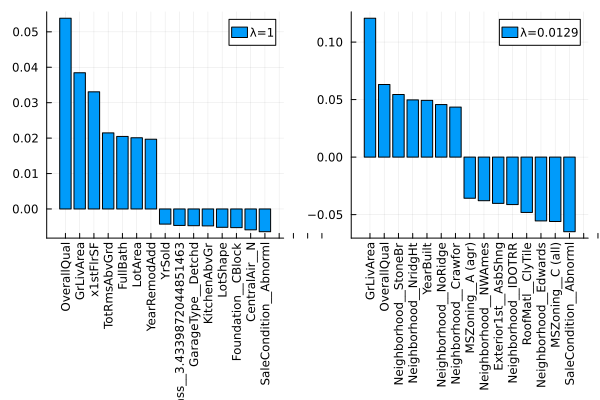

In [9]:
using Plots
p1 = bar(last.(p1_coefs), label="λ=1", xrotation=90)
xticks!(1:20 .-0.5, string.(first.(p1_coefs)))
p2 = bar(last.(p2_coefs), label="λ=0.0129", xrotation=90)
xticks!(1:20 .-0.5, string.(first.(p2_coefs)))
plot(p1, p2, layout=(1,2))

셀프 튜닝 파이프라인

In [10]:
ridge = Ridge();
lambda_range = range(ridge, :lambda, lower=0.001, upper=100, scale=:log);
ridge_tuned = TunedModel(ridge,
    resampling = CV(nfolds=5, rng=0),
    tuning = Grid(resolution=10),
    range = lambda_range,
    measure = rmse
);

Tree = @load DecisionTreeRegressor pkg=DecisionTree verbosity=0
tree = Tree();
depth_range = range(tree, :max_depth, lower=1, upper=10);
sample_range = range(tree, :min_samples_leaf, lower=1, upper=10);
tree_tuned = TunedModel(tree, 
    resampling = CV(nfolds=5, rng=0),
    tuning = RandomSearch(rng=0),
    range = [depth_range, sample_range],
    n = 25,
    measure = rmse
);

reg_tuned = TunedModel(models = [ridge_tuned, tree_tuned],
    resampling = CV(nfolds=3, rng=0),
    measure = rmse
);

pipe = Pipeline(
    std = Standardizer(count=true),
    enc = ContinuousEncoder(drop_last=true),
    reg = reg_tuned
);

mach = machine(pipe, X_train, log.(y_train));
fit!(mach, verbosity=0);
rmse(predict(mach, X_test), log.(y_test))

0.1130799889854098

In [11]:
fitted_params(mach).reg.best_fitted_params.best_model

RidgeRegressor(
  lambda = 0.012915496650148841, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

타겟 변환

In [12]:
reg_transtgt = TransformedTargetModel(reg_tuned, 
    transformer = y->log.(y), inverse = z->exp.(z));

pipe = Pipeline(
    std = Standardizer(count=true),
    enc = ContinuousEncoder(drop_last=true),
    reg = reg_transtgt
);

mach = machine(pipe, X_train, y_train);
fit!(mach, verbosity=0);
rmsle(predict(mach, X_test), y_test)

0.1130799889854098

박스 칵스 변환

In [13]:
reg_transtgt = TransformedTargetModel(reg_tuned, 
    transformer = UnivariateBoxCoxTransformer())

pipe = Pipeline(
    std = Standardizer(count=true),
    enc = ContinuousEncoder(drop_last=true),
    reg = reg_transtgt
);

mach = machine(pipe, X_train, y_train);
fit!(mach, verbosity=0);

fitted_params(mach).reg.transformer

(λ = 0.06,
 c = 0.0,)

### 13.3. 파이프라인 (학습 네트워크)

프로토타이핑

In [14]:
Xs = source(X_train);
stand_model = Standardizer(count=true);
stand_mach = machine(stand_model, Xs);
X_stand = MLJ.transform(stand_mach, Xs)
fit!(X_stand, verbosity=0);
X_stand()

Row,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,x1stFlrSF,x2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,x3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
,Cat…,Cat…,Float64,Float64,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Float64,Float64,Cat…,Cat…,Cat…,Cat…,Cat…,Float64,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Float64,Cat…,Float64,Float64,Float64,Cat…,Cat…,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Float64,Cat…,Float64,Cat…,Cat…,Float64,Cat…,Float64,Float64,Cat…,Cat…,Cat…,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Cat…,Cat…,Float64,Cat…,Float64,Cat…,Cat…
1,5.0814,FV,-2.89817,-2.79957,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,0.900284,0.750638,Gable,CompShg,MetalSd,MetalSd,BrkFace,1.23882,Gd,TA,PConc,Gd,TA,No,BLQ,0.672577,Unf,-0.367499,-0.576046,-0.246822,GasA,Ex,Y,SBrkr,-1.77161,1.08688,-0.105776,-0.410963,1.08723,-0.243981,0.767816,1.22632,-1.03663,-0.20529,Gd,-1.57728,Typ,-0.938045,NA,Detchd,0.818431,Unf,0.292016,-0.067796,TA,TA,Y,-0.949539,0.707624,-0.42067,-0.110724,-0.317396,-0.0697724,NA,NA,NA,-0.192919,3,0.156697,WD,Normal
2,5.0814,FV,-2.00054,-2.83929,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,0.933545,0.750638,Gable,CompShg,MetalSd,MetalSd,BrkFace,1.57384,Gd,TA,PConc,Gd,TA,No,GLQ,0.60761,Unf,-0.367499,0.116936,-0.0623442,GasA,Ex,Y,SBrkr,-1.17285,1.14326,-0.105776,0.17314,-0.815422,-0.243981,0.767816,1.22632,-1.03663,-0.20529,Gd,-1.57728,Typ,0.597414,TA,Detchd,0.851595,Unf,0.292016,-0.170374,TA,TA,Y,-0.949539,0.523663,-0.42067,-0.110724,-0.317396,-0.0697724,NA,NA,NA,-0.192919,6,-0.599503,WD,Normal
3,4.33073,RM,-0.06422,-0.012725,Pave,NA,IR1,Bnk,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,6,-1.86038,-1.65094,Gable,CompShg,MetalSd,MetalSd,None,-0.800128,TA,TA,BrkTil,TA,TA,No,Unf,-1.41869,Unf,-0.367499,0.585019,-0.00234764,GasA,Ex,Y,SBrkr,-0.938329,1.1877,-0.105776,0.517696,-0.815422,-0.243981,-1.04021,-0.755699,0.169341,-0.20529,TA,0.352144,Typ,0.597414,Gd,Detchd,-1.93419,Unf,-1.03893,-1.17284,TA,TA,Y,-0.949539,-1.10345,2.92195,-0.110724,-0.317396,-0.0697724,NA,NA,NA,-0.192919,7,-1.3557,ConLw,Normal
4,3.93183,RL,-0.294201,0.0388514,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1.5Fin,5,6,-1.02885,-1.65094,Gable,CompShg,VinylSd,VinylSd,None,-0.800128,TA,TA,CBlock,TA,Fa,Mn,LwQ,0.414936,Rec,2.75886,-2.96368,-0.225819,GasA,TA,N,SBrkr,-1.81186,1.01458,-0.105776,-0.780781,-0.815422,3.8916,-1.04021,-0.755699,0.169341,-0.20529,TA,-0.934138,Typ,-0.938045,NA,Detchd,-1.10509,Unf,-1.03893,-1.28941,TA,Fa,Y,0.552626,-1.10345,-0.42067,-0.110724,-0.317396,-0.0697724,NA,NA,NA,-0.192919,3,0.156697,ConLw,Normal
5,3.04452,RL,-0.200024,-0.339831,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,-0.430154,0.894733,Hip,CompShg,BrkFace,BrkFace,None,-0.800128,TA,TA,CBlock,TA,TA,No,GLQ,0.712146,Unf,-0.367499,0.28962,0.192327,GasA,Ex,Y,SBrkr,-0.177359,-0.874456,-0.105776,-0.985169,1.08723,-0.243981,-1.04021,-0.755699,0.169341,-0.20529,Gd,-0.290997,Typ,-0.938045,NA,Attchd,-0.508134,RFn,-1.03893,-0.888423,TA,TA,Y,-0.949539,-1.10345,-0.42067,-0.110724,-0.317396,-0.0697724,NA,NA,Shed,-0.192919,7,-0.599503,WD,Normal
6,3.04452,RL,1.17782,1.33474,Pave,NA,Reg,Bnk,AllPub,Corner,Mod,Crawfor,PosA,Norm,1F

In [15]:
Xs = source(X_train);
stand_model = Standardizer(count=true);
stand_mach = machine(stand_model, Xs);
X_stand = MLJ.transform(stand_mach, Xs)
fit!(X_stand, verbosity=0);
X_stand()

encoder_model = ContinuousEncoder(drop_last=true);
encoder_mach = machine(encoder_model, X_stand);
X_encoder = MLJ.transform(encoder_mach, X_stand);

ys = source(y_train);
log_y = log(ys);

reg_model = Ridge();
reg_mach = machine(reg_model, X_encoder, log_y);
log_y_hat = predict(reg_mach,  X_encoder);
y_hat = exp(log_y_hat);

fit!(y_hat, verbosity=0);
rmsle(y_hat(X_test), y_test) # evaluate

0.13586079473017235

In [16]:
machines(X_encoder)

2-element Vector{Machine}:
 machine(ContinuousEncoder(drop_last = true, …), …)
 machine(Standardizer(features = Symbol[], …), …)

학습 네트워크 내보내기(export)

In [43]:
mutable struct MyRegressor <: DeterministicNetworkComposite
    stand_count::Bool
    reg::Deterministic
end
import MLJBase
function MLJBase.prefit(model::MyRegressor, verbosity, X, y)
    Xs = source(X)

    stand_model = Standardizer(count=model.stand_count)
    stand_mach = machine(stand_model, Xs)
    X_stand = MLJ.transform(stand_mach, Xs)

    encoder_model = ContinuousEncoder(drop_last=true)
    encoder_mach = machine(encoder_model, X_stand)
    X_encoder = MLJ.transform(encoder_mach, X_stand)

    ys = source(y)
    log_y = log(ys)

    reg_model = model.reg
    reg_mach = machine(reg_model, X_encoder, log_y)
    reg_fitted_params = node(fitted_params, reg_mach)

    log_y_hat = predict(reg_mach, X_encoder)
    y_hat = exp(log_y_hat)
    
    return (
        predict = y_hat,
        fitted_params = (; reg = reg_fitted_params)
    )
end

In [44]:
reg = MyRegressor(true, Ridge())
mach = machine(reg, X_train, y_train)
fit!(mach, verbosity=0)
rmsle(predict(mach, X_test), y_test)

0.13586079473017235

In [45]:
fitted_params(mach)

(reg = (coefs = [Symbol("MSSubClass__3.044522437723423") => 0.004341279119580587, Symbol("MSSubClass__3.4339872044851463") => -0.004642401171018843, Symbol("MSSubClass__3.713572066704308") => 9.223163293561246e-5, Symbol("MSSubClass__3.828641396489095") => 0.00016444097493620158, Symbol("MSSubClass__3.9318256327243257") => 0.00038536944870149435, Symbol("MSSubClass__4.110873864173311") => 0.002243128615080243, Symbol("MSSubClass__4.2626798770413155") => 0.001952487991941603, Symbol("MSSubClass__4.330733340286331") => 0.00016385654032177898, Symbol("MSSubClass__4.394449154672439") => -0.0016608062835003713, Symbol("MSSubClass__4.454347296253507") => 3.436100842853616e-5  …  :SaleType__ConLI => -0.00019533806099738675, :SaleType__ConLw => -0.00021375833791048972, :SaleType__New => 0.005356926155622187, :SaleType__Oth => 4.983064800517478e-5, :SaleType__VWD => 0.0, :SaleCondition__Abnorml => -0.0064232040423459, :SaleCondition__AdjLand => 7.309052045642022e-5, :SaleCondition__Alloca => 0.

In [46]:
reg = MyRegressor(true, Deterministic());
reg_range = range(reg, :reg, values=[ridge_tuned, tree_tuned]);
reg_tuned = TunedModel(reg, 
    resampling = CV(nfolds=3, rng=0),
    tuning = Grid(rng=0),
    range = reg_range,
    measure = rmse
);

mach = machine(reg_tuned, X_train, y_train);
@time fit!(mach, verbosity=0);
rmsle(predict(mach, X_test), y_test)

  9.646618 seconds (17.38 M allocations: 2.858 GiB, 7.06% gc time, 59.73% compilation time)


0.1130799889854098

In [48]:
fitted_params(mach).best_fitted_params.reg.best_model

RidgeRegressor(
  lambda = 0.012915496650148841, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

### 13.4. 배깅

In [49]:
pre_pipe = Standardizer(count=true) |> ContinuousEncoder(drop_last=true);
mach = machine(pre_pipe, X_train);
fit!(mach, verbosity=0);
X_train_prep = MLJ.transform(mach, X_train);
X_test_prep = MLJ.transform(mach, X_test);

EnsembleModel

In [50]:

Tree = @load DecisionTreeRegressor pkg=DecisionTree verbosity=0
tree_base = Tree(min_samples_leaf = 1, n_subfeatures = 0, rng=0)
mach_tree = machine(tree_base, X_train_prep, log.(y_train));
fit!(mach_tree, verbosity=0);
tree_err = rmse(predict(mach_tree, X_test_prep), log.(y_test))

0.20047633726382572

In [51]:
Tree = @load DecisionTreeRegressor pkg=DecisionTree verbosity=0
tree = Tree(min_samples_leaf = 1, n_subfeatures = 50, rng=0)
ensem = EnsembleModel(tree, bagging_fraction = 0.7, n=100, rng=0)
mach_ensem = machine(ensem, X_train_prep, log.(y_train));
fit!(mach_ensem, verbosity=0);
ensem_err = rmse(predict(mach_ensem, X_test_prep), log.(y_test))

0.1268050175635041

학습 네트워크

In [53]:
import Random, StatsBase
Xs = source(X_train_prep);
ys = source(log.(y_train));
n_trees = 100; # 나무 복제 개수
# 샘플링 노드 시작
n_train = nrow(X_train_prep); # 학습 데이터 개수
n_smpl = floor(Int, n_train * 0.7); # 샘플 개수 (샘플링 비율 0.7)
rng = Random.MersenneTwister(0);
smpl_rows = [StatsBase.sample(rng, 1:n_train, n_smpl, replace=false) for i in 1:n_trees];
smpl_X = [node(x -> x[smpl_rows[i], :], Xs) for i in 1:n_trees];
smpl_y = [node(x -> x[smpl_rows[i]], ys) for i in 1:n_trees];
# 샘플링 노드 종료
tree_machs = [machine(tree, smpl_X[i], smpl_y[i]) for i in 1:n_trees];
y_trees = [predict(tree_machs[i], Xs) for i in 1:n_trees];
y_forest = node((args...) -> mean(args), y_trees...);
fit!(y_forest, verbosity=0);
lnet_norepl_err = rmse(y_forest(X_test_prep), log.(y_test))

0.12680501756350424

학습 네트워크 복원 추출

In [54]:
rng = Random.MersenneTwister(0);
smpl_rows = [StatsBase.sample(rng, 1:n_train, n_smpl, replace=true) for i in 1:n_trees];
smpl_X = [node(x -> x[smpl_rows[i], :], Xs) for i in 1:n_trees];
smpl_y = [node(x -> x[smpl_rows[i]], ys) for i in 1:n_trees];
# 샘플링 노드 종료
tree_machs = [machine(tree, smpl_X[i], smpl_y[i]) for i in 1:n_trees];
y_trees = [predict(tree_machs[i], Xs) for i in 1:n_trees];
y_forest = node((args...) -> mean(args), y_trees...);
fit!(y_forest, verbosity=0);
lnet_repl_err = rmse(y_forest(X_test_prep), log.(y_test))

0.1282507409682256

RandomForest

In [55]:
Forest = @load RandomForestRegressor pkg=DecisionTree verbosity=0;
forest = Forest(min_samples_leaf = 1, 
    n_subfeatures = 50, n_trees=100, sampling_fraction=0.7, rng=0);
mach_forest = machine(forest, X_train_prep, log.(y_train));
fit!(mach_forest, verbosity=0);
forest_err = rmse(predict(mach_forest, X_test_prep), log.(y_test))

0.12731047468611129

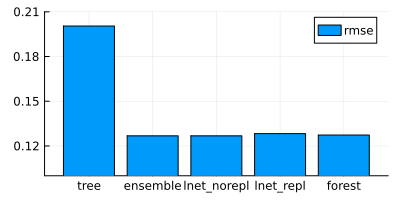

In [56]:
x = ["tree", "ensemble", "lnet_norepl", "lnet_repl", "forest"]
y = [tree_err, ensem_err, lnet_norepl_err, lnet_repl_err, forest_err]
gr(size=(400,200))
bar(x, y, label="rmse", ylims=(0.1, 0.21))

### 13.5. 스태킹

스태킹 과정

In [60]:
Ridge = @load RidgeRegressor pkg=MLJLinearModels verbosity=0
Forest = @load RandomForestRegressor pkg=DecisionTree verbosity=0
EvoTree = @load EvoTreeRegressor pkg=EvoTrees verbosity=0
XGB = @load XGBoostRegressor pkg=XGBoost verbosity=0
LGBM = @load LGBMRegressor pkg=LightGBM verbosity=0

[ Info: lib_lightgbm not found in system dirs, trying fallback


LightGBM.MLJInterface.LGBMRegressor

In [61]:
function get_base_models()
    ridge = Ridge(lambda=0.01)
    forest = Forest(n_subfeatures=80, n_trees=100, 
                sampling_fraction=1.0, rng=0)
    evotree = EvoTree(nrounds=100, 
                rowsample=0.8, colsample=0.8, rng=0)
    xgb = XGB(max_depth=4, colsample_bytree=0.8, seed=0)
    lgbm = LGBM(num_iterations=100)
    [:ridge => ridge, :forest => forest, :evotree => evotree, 
                :xgb => xgb, :lgbm => lgbm]
end

get_base_models (generic function with 1 method)

In [62]:
base_models = get_base_models();
Linear = @load LinearRegressor pkg=MLJLinearModels verbosity=0;
stack_model = Stack(;metalearner=Linear(),
                resampling=CV(nfolds=3, rng=0),
                measures=rmse,
                base_models...);

In [63]:
function get_rmses(models, X_tr, y_tr, X_te, y_te)
    res = []
    for m in models
        println("fitting $(first(m))...")
        model = last(m)
        mach = machine(model, X_tr, y_tr)
        fit!(mach, verbosity=0);
        e = rmse(predict(mach, X_te), y_te)
        push!(res, first(m) => (mach = mach, err = e))
    end
    res
end
all_models = vcat(base_models, [:stack => stack_model]);
data = X_train_prep, log.(y_train), X_test_prep, log.(y_test);
rmses = get_rmses(all_models, data...)

fitting ridge...
fitting forest...
fitting evotree...
fitting xgb...
fitting lgbm...
fitting stack...


6-element Vector{Any}:
   :ridge => (mach = machine(RidgeRegressor(lambda = 0.01, …), …), err = 0.11284289678885348)
  :forest => (mach = machine(RandomForestRegressor(max_depth = -1, …), …), err = 0.12565780505233184)
 :evotree => (mach = machine(EvoTrees.EvoTreeRegressor{EvoTrees.Linear, Float32}
 - nrounds: 100
 - lambda: 0.0
 - gamma: 0.0
 - eta: 0.1
 - max_depth: 5
 - min_weight: 1.0
 - rowsample: 0.8
 - colsample: 0.8
 - nbins: 32
 - alpha: 0.5
 - monotone_constraints: Dict{Int64, Int64}()
 - rng: Random.TaskLocalRNG()
 - device: cpu
, …), err = 0.12448765140638025)
     :xgb => (mach = machine(XGBoostRegressor(test = 1, …), …), err = 0.11678436671738333)
    :lgbm => (mach = machine(LGBMRegressor(boosting = gbdt, …), …), err = 0.1165071285750238)
   :stack => (mach = machine(DeterministicStack(metalearner = LinearRegressor(fit_intercept = true, …), …), …), err = 0.10545482837716244)

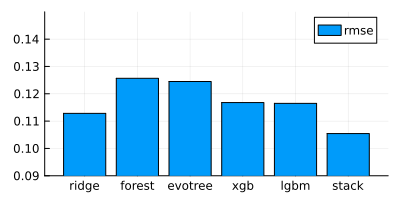

In [64]:
x = string.(first.(rmses));
y = map(v -> v.err, last.(rmses));
bar(x, y, label="rmse", ylim=(0.09, 0.15))

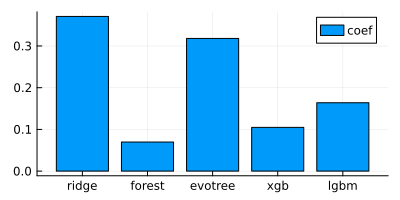

In [65]:
stack_mach = rmses[end].second.mach;
meta_params = fitted_params(stack_mach).metalearner;
x = string.(first.(base_models));
bar(x, last.(meta_params.coefs), label="coef")

학습 네트워크

In [66]:
mutable struct MyStacker <: DeterministicNetworkComposite
    base_models::Vector{Deterministic}
    n_folds::Int64
end

In [67]:
function MLJBase.prefit(model::MyStacker, verbosity, X, y)
    base_models = model.base_models
    n_folds = model.n_folds
    Xs = source(X)
    ys = source(y)
    folds_rto = (1/n_folds for i in 1:(n_folds-1))
    # 학습셋 교차검증용 K-폴드
    folds = partition(1:length(y), folds_rto...; rng=0)
    # out-of-sample (검증셋) 예측 결과용 배열
    oos_preds = Vector{Node}(undef, length(base_models))
    for (i, m) in enumerate(base_models)
        preds = Vector{Node}(undef, n_folds)
        for j in 1:n_folds
            # K-폴드 내 학습 폴드 노드
            X_tr = node(x -> corestrict(x, folds, j), Xs)
            y_tr = node(x -> corestrict(x, folds, j), ys)
            mach = machine(m, X_tr, y_tr)
            # K-폴드 내 검증 폴드 노드
            X_val = node(x -> restrict(x, folds, j), Xs)
            preds[j] = predict(mach, X_val)
        end
        oos_preds[i] = vcat(preds...)
    end
    # 검증셋 예측 결과로 구성된 메타 모델 학습 데이터
    meta_X_tr = MLJ.table(hcat(oos_preds...));
    shuffled_idx = vcat(folds...);
    # 메타 모델 타겟 데이터 (폴드 생성 시 셔플된 순서 적용)
    meta_y_tr = node(x -> x[shuffled_idx], ys);
    # 메타 모델 학습 머신
    meta_mach = machine(Linear(), meta_X_tr, meta_y_tr);
    meta_fitted_params = node(fitted_params, meta_mach)

    # 학습셋 전체로 학습하는 베이스 모델 머신
    base_machs = [machine(m, Xs, ys) for m in base_models];
    base_preds = [predict(mach, Xs) for mach in base_machs];
    meta_X = MLJ.table(hcat(base_preds...));
    # 학습셋 전체로 학습된 베이스 모델의 예측 결과를 바탕으로 예측하는 메타모델 
    y_hat = predict(meta_mach, meta_X);
    
    return (
        predict = y_hat,
        fitted_params = (; meta = meta_fitted_params)
    )
end

In [68]:
base_models = get_base_models();
mystack_model = MyStacker(last.(base_models), 3);
mystack_mach = machine(mystack_model, X_train_prep, log.(y_train));
fit!(mystack_mach, verbosity=0);
rmse(predict(mystack_mach, X_test_prep), log.(y_test))

0.10704829709246368

In [70]:
fitted_params(mystack_mach)

(meta = (coefs = [:x1 => 0.36268367388096145, :x2 => 0.06307923737539603, :x3 => 0.35791706924241884, :x4 => 0.10227773790339682, :x5 => 0.14458912316345557],
         intercept = -0.35720892617597616,),)

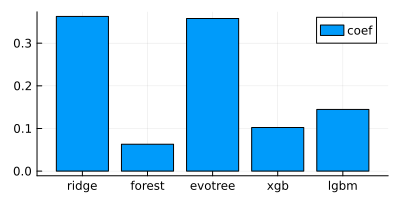

In [71]:
x = string.(first.(base_models));
y = last.(fitted_params(mystack_mach).meta.coefs)
bar(x, y, label="coef")